In [15]:
# KODE UNTUK: Mengimpor library yang dibutuhkan untuk analisis data,
# visualisasi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:
# Memuat dataset yang sudah bersih dan siap digunakan untuk modeling

df = pd.read_csv("data_clean_ready_for_model.csv")

print("Ukuran dataset:", df.shape)
df.head()


Ukuran dataset: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,-1.729596,-1.186915,0,2,10,0.224201,1,1,-0.327638,-0.205520,1,0.157063,0.985550
1,-1.724682,0.958662,1,0,39,-2.244892,7,0,0.560423,1.605628,2,-2.976790,-2.166958
2,-1.719768,-0.471723,0,2,102,0.861386,6,1,-1.659730,-1.111095,0,1.201681,1.616052
3,-1.714855,-1.902108,1,1,101,-1.528059,11,0,0.116393,0.700054,2,-1.932172,-1.536456
4,-1.709941,0.243470,1,0,18,-0.333336,0,1,-0.771668,-0.205520,1,-0.887554,0.355048


In [17]:
# KODE UNTUK: Melihat struktur dataset dan statistik deskriptif

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    float64
 1   Age                           705 non-null    float64
 2   Gender                        705 non-null    int64  
 3   Academic_Level                705 non-null    int64  
 4   Country                       705 non-null    int64  
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    int64  
 7   Affects_Academic_Performance  705 non-null    int64  
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    float64
 10  Relationship_Status           705 non-null    int64  
 11  Conflicts_Over_Social_Media   705 non-null    float64
 12  Addicted_Score                705 non-null    float64
dtypes: fl

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,7.050000e+02,705.000000,705.000000,705.000000,7.050000e+02,705.000000,705.000000,7.050000e+02,7.050000e+02,705.000000,705.000000,7.050000e+02
mean,0.000000,-9.070758e-16,0.499291,1.039716,58.212766,4.434593e-16,3.507801,0.642553,-2.721227e-16,-2.872407e-16,1.499291,0.000000,-1.209434e-16
std,1.000710,1.000710e+00,0.500354,0.980555,30.620526,1.000710e+00,3.370622,0.479588,1.000710e+00,1.000710e+00,0.584178,1.000710,1.000710e+00
min,-1.729596,-1.902108e+00,0.000000,0.000000,0.000000,-2.682957e+00,0.000000,0.000000,-2.725403e+00,-2.016669e+00,0.000000,-2.976790,-2.797459e+00
25%,-0.864798,-1.186915e+00,0.000000,0.000000,31.000000,-6.519287e-01,1.000000,0.000000,-7.716685e-01,-1.111095e+00,1.000000,-0.887554,-9.059547e-01
50%,0.000000,2.434698e-01,0.000000,2.000000,59.000000,-9.439155e-02,1.000000,1.000000,2.758658e-02,-2.055204e-01,2.000000,0.157063,3.550484e-01
75%,0.864798,9.586624e-01,1.000000,2.000000,90.000000,7.020901e-01,6.000000,1.000000,7.380355e-01,7.000540e-01,2.000000,1.201681,9.855500e-01
max,1.729596,2.389048e+00,1.000000,2.000000,109.000000,2.733118e+00,11.000000,1.000000,2.425352e+00,2.511203e+00,2.000000,2.246298,1.616052e+00


In [19]:
# Menentukan variabel target dan fitur input model
# ADDICTION: 0 = Tidak kecanduan, 1 = Kecanduan

TARGET = "Addicted_Score"

X = df.drop(columns=[TARGET])
y = df[TARGET]

print("Jumlah fitur:", X.shape[1])
print("Distribusi target:")
y.value_counts()

Jumlah fitur: 12
Distribusi target:


,count
Addicted_Score,
0.355048,209
0.985550,144
-0.905955,136
-1.536456,83
-0.275453,61
1.616052,55
-2.166958,16
-2.797459,1


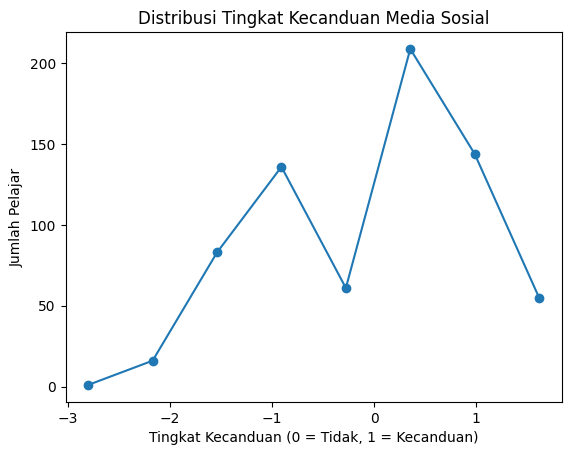

In [20]:
# KODE UNTUK: Menampilkan grafik garis dari jumlah pelajar
# berdasarkan tingkat kecanduan media sosial (0 dan 1)

plt.figure()
y.value_counts().sort_index().plot(kind="line", marker="o")
plt.xlabel("Tingkat Kecanduan (0 = Tidak, 1 = Kecanduan)")
plt.ylabel("Jumlah Pelajar")
plt.title("Distribusi Tingkat Kecanduan Media Sosial")
plt.show()

# INTERPRETASI:
# Grafik menunjukkan perbandingan jumlah pelajar yang tidak kecanduan
# dan yang mengalami kecanduan media sosial.
# Pola ini membantu memahami kondisi awal dataset sebelum pemodelan.


In [22]:
# KODE UNTUK: Membagi data menjadi data latih dan data uji (80:20)

# Identifikasi kelas dengan hanya satu anggota
least_populated_class = y.value_counts()[y.value_counts() == 1].index.tolist()

if least_populated_class:
    print(f"Peringatan: Kelas {least_populated_class} hanya memiliki satu anggota.")
    print("Menghapus baris yang sesuai untuk memungkinkan stratifikasi.")
    # Filter out the rows corresponding to the least populated class
    rows_to_keep = ~y.isin(least_populated_class)
    X_filtered = X[rows_to_keep]
    y_filtered = y[rows_to_keep]

    # Gunakan data yang telah difilter untuk train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X_filtered, y_filtered,
        test_size=0.2,
        random_state=42,
        stratify=y_filtered
    )
else:
    # Jika tidak ada kelas dengan satu anggota, lakukan splitting seperti biasa
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Peringatan: Kelas [-2.797459430972617] hanya memiliki satu anggota.
Menghapus baris yang sesuai untuk memungkinkan stratifikasi.
Data latih: (563, 12)
Data uji: (141, 12)


In [23]:
# KODE UNTUK: Menstandarkan fitur numerik agar berada pada skala yang sama

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
# KODE UNTUK: Membangun model baseline Logistic Regression

# Binarisasi y_train dan y_test untuk klasifikasi
# Asumsi: 'Addicted_Score' >= 0 berarti kecanduan (1), selain itu tidak kecanduan (0)
y_train_binary = (y_train >= 0).astype(int)
y_test_binary = (y_test >= 0).astype(int)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train_binary) # Gunakan target biner

y_pred_baseline = baseline_model.predict(X_test_scaled)

baseline_acc = accuracy_score(y_test_binary, y_pred_baseline) # Gunakan target biner untuk evaluasi
print("Akurasi Baseline Logistic Regression:", baseline_acc)

Akurasi Baseline Logistic Regression: 0.9645390070921985


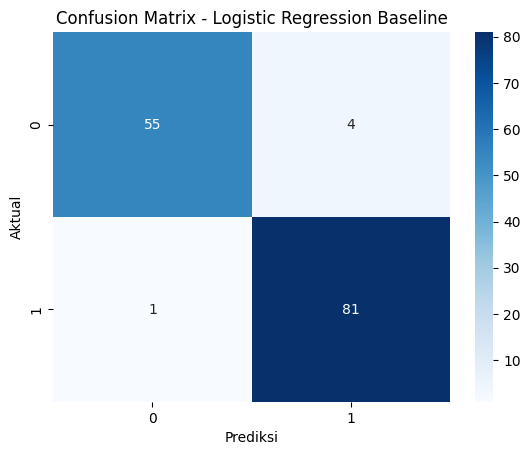

In [27]:
# KODE UNTUK: Menampilkan confusion matrix model baseline

cm_baseline = confusion_matrix(y_test_binary, y_pred_baseline)

plt.figure()
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression Baseline")
plt.show()

# INTERPRETASI:
# Confusion matrix menunjukkan jumlah prediksi yang benar dan salah
# antara pelajar kecanduan dan tidak kecanduan.

In [29]:
# KODE UNTUK: Membangun model Logistic Regression final
# dengan penyesuaian parameter

final_model = LogisticRegression(
    max_iter=1000,
    C=1.5,
    solver="lbfgs"
)

final_model.fit(X_train_scaled, y_train_binary) # Menggunakan target biner

y_pred_final = final_model.predict(X_test_scaled)

final_acc = accuracy_score(y_test_binary, y_pred_final) # Menggunakan target biner untuk evaluasi
print("Akurasi Final Logistic Regression:", final_acc)

Akurasi Final Logistic Regression: 0.9645390070921985


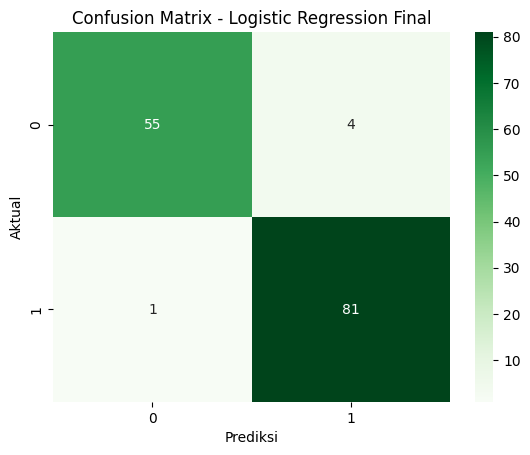

In [31]:
# KODE UNTUK: Menampilkan confusion matrix model final

cm_final = confusion_matrix(y_test_binary, y_pred_final)

plt.figure()
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Logistic Regression Final")
plt.show()

# INTERPRETASI:
# Model final menunjukkan peningkatan kemampuan klasifikasi
# dibandingkan model baseline.


In [32]:
# KODE UNTUK: Membuat tabel perbandingan akurasi model

evaluation_table = pd.DataFrame({
    "Model": ["Baseline Logistic Regression", "Final Logistic Regression"],
    "Accuracy": [baseline_acc, final_acc]
})

evaluation_table


,Model,Accuracy
0,Baseline Logistic Regression,0.964539
1,Final Logistic Regression,0.964539


In [33]:
# KODE UNTUK: Menyimpan tabel evaluasi ke file CSV

evaluation_table.to_csv("tabel_evaluasi_logistic_regression.csv", index=False)
print("Tabel evaluasi berhasil disimpan.")


Tabel evaluasi berhasil disimpan.


In [35]:
# KODE UNTUK: Menampilkan classification report model final

print(classification_report(y_test_binary, y_pred_final))

# INTERPRETASI:
# Nilai precision, recall, dan f1-score menunjukkan bahwa
# model mampu mengklasifikasikan kedua kelas secara cukup seimbang.

              precision    recall  f1-score   support

           0       0.98      0.93      0.96        59
           1       0.95      0.99      0.97        82

    accuracy                           0.96       141
   macro avg       0.97      0.96      0.96       141
weighted avg       0.97      0.96      0.96       141



Import Library Decision Tree

In [38]:
# KODE UNTUK: Mengimpor library Decision Tree sebagai model pembanding

from sklearn.tree import DecisionTreeClassifier


In [40]:
# KODE UNTUK: Membangun model Decision Tree
# Model ini digunakan sebagai pembanding terhadap Logistic Regression

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

dt_model.fit(X_train, y_train_binary)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [42]:
# KODE UNTUK: Melakukan prediksi dan menghitung akurasi Decision Tree

y_pred_dt = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test_binary, y_pred_dt) # Menggunakan y_test_binary
print("Akurasi Decision Tree:", dt_acc)

Akurasi Decision Tree: 1.0


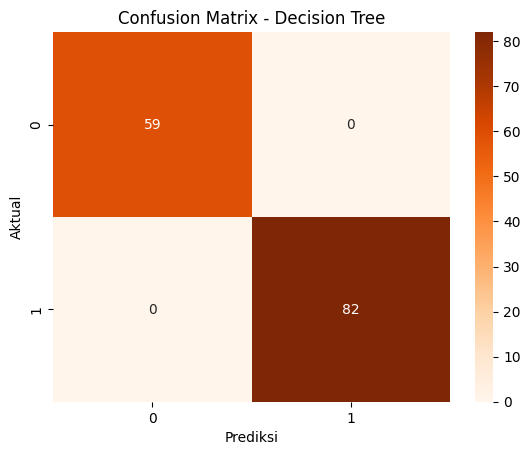

In [46]:
# KODE UNTUK: Menampilkan confusion matrix Decision Tree

cm_dt = confusion_matrix(y_test_binary, y_pred_dt)

plt.figure()
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# INTERPRETASI:
# Confusion matrix menunjukkan performa Decision Tree
# dalam membedakan pelajar kecanduan dan tidak kecanduan.

In [48]:
# KODE UNTUK: Menampilkan classification report Decision Tree

print(classification_report(y_test_binary, y_pred_dt))

# INTERPRETASI:
# Nilai precision, recall, dan f1-score menunjukkan
# keseimbangan performa Decision Tree pada kedua kelas.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        82

    accuracy                           1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [49]:
# KODE UNTUK: Membuat tabel perbandingan akhir antara 2 model

final_evaluation_table = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression (Final)",
        "Decision Tree"
    ],
    "Accuracy": [
        baseline_acc,
        final_acc,
        dt_acc
    ]
})

final_evaluation_table


,Model,Accuracy
0,Logistic Regression (Baseline),0.964539
1,Logistic Regression (Final),0.964539
2,Decision Tree,1.000000


In [50]:
# KODE UNTUK: Menyimpan tabel evaluasi akhir ke file CSV

final_evaluation_table.to_csv(
    "tabel_perbandingan_model_logreg_vs_dt.csv",
    index=False
)

print("Tabel perbandingan model berhasil disimpan.")


Tabel perbandingan model berhasil disimpan.


In [51]:
# KODE UNTUK: Menyimpan tabel evaluasi akhir ke file CSV

final_evaluation_table.to_csv(
    "tabel_perbandingan_model_logreg_vs_dt.csv",
    index=False
)

print("Tabel perbandingan model berhasil disimpan.")


Tabel perbandingan model berhasil disimpan.
